# Problem Set 1, due April 13th at 3:30pm 
(in other words, it is due at noon, or one minute after 11:59am).

###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [36]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

IPython version:       4.1.2 (need at least 1.0)
Numpy version:        1.10.4 (need at least 1.7.1)
SciPy version:        0.17.0 (need at least 0.12.0)
Pandas version:       0.18.0 (need at least 0.11.0)
Mapltolib version:     1.5.1 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
flights_df= pd.read_csv('/Users/abhi/Documents/UW/Courses/Spring_Quarter_17/INFX-574/data/Problem_Set_1/flights.csv')

In [39]:
print flights_df.shape
print flights_df.columns
print flights_df.dtypes

(336776, 17)
Index([u'Unnamed: 0', u'year', u'month', u'day', u'dep_time', u'dep_delay',
       u'arr_time', u'arr_delay', u'carrier', u'tailnum', u'flight', u'origin',
       u'dest', u'air_time', u'distance', u'hour', u'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [40]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [41]:
dest_seattle = len(flights_df[flights_df['dest'] == 'SEA'])

In [42]:
dest_seattle

3923

Since all the flights originate form NYC, we need to consider only the flights where the destination is Seattle. Here we see that we have performed indexing of only those flights in the NYC dataset whose 'dest' is SEA. Once we do that we calculate the number of rows in the filtered dataset which is 3923

(b) How many airlines fly from NYC to Seattle?

In [43]:
unique_carriers = set(flights_df[flights_df['dest'] == 'SEA']['carrier'])

In [44]:
print unique_carriers, len(unique_carriers)

set(['AA', 'B6', 'AS', 'UA', 'DL']) 5


<b> Ans </b> Here we perform the same filtering as above but also reduce the dataset to only the 'carrier' column. After doing this we pass the dataset through the set datatype in order to obtain unique carrier names. Thus we can see that there are 5 unique carriers from NYC to Seattle are as above. Just for curiosity I took a look at the names of these given acronyms which are American Airlines, Alaskan Airlines, JetBlue, Delta and United Airlines :) 

(c) How many unique air planes fly from NYC to Seattle?

In [45]:
unique_planes = set(flights_df[flights_df['dest'] == 'SEA']['tailnum'])
len(unique_planes) - 1 #noticed that one in the set is a nan

935

<b> Ans </b> We perform filtering first on the flights dataframe to obtain only those flights that fly from NYC to SEA. After doing that we perform filtering on the 'tailnum' column that contains flight numbers which are unique for every airplane. This helps us identify the number of unique air planes that fly from NYC to Seattle 

(d) What is the average arrival delay for flights from NC to Seattle?

In [46]:
flights_seattle = flights_df[flights_df['dest'] == 'SEA']
print flights_seattle.head()
which_vals = flights_seattle[np.isnan(flights_seattle['arr_delay'])]
which_vals.head()
which_vals.sum()
bool1 = np.isnan(flights_seattle['arr_delay'])
valid_flights = flights_seattle[bool1 == False]
avg_delay = sum(valid_flights['arr_delay'])/len(valid_flights)
print ""
print "Average arrival delay for flights from NYC to SEA is :", avg_delay


     Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
78           79  2013      1    1     724.0       -1.0    1020.0      -10.0   
93           94  2013      1    1     743.0       13.0    1059.0        3.0   
165         166  2013      1    1     857.0        6.0    1157.0      -25.0   
401         402  2013      1    1    1418.0       -1.0    1726.0       -6.0   
404         405  2013      1    1    1421.0       26.0    1735.0       26.0   

    carrier tailnum  flight origin dest  air_time  distance  hour  minute  
78       AS  N594AS      11    EWR  SEA     338.0      2402   7.0    24.0  
93       DL  N3760C     495    JFK  SEA     349.0      2422   7.0    43.0  
165      UA  N45440    1670    EWR  SEA     343.0      2402   8.0    57.0  
401      UA  N37464      16    EWR  SEA     348.0      2402  14.0    18.0  
404      B6  N503JB      83    JFK  SEA     349.0      2422  14.0    21.0  

Average arrival delay for flights from NYC to SEA is : -1.0990990991

<b> Ans </b> We first observe that there are 38 values in the flights form NYC to SEA that have arr_delay values as NaN. Therefore inorder to calculate the average arrival delay we can either impute ( discard ) these values. After discarding these values we observe that the average arrival delay of flight form NYC to SEA is -1.0990990991

(e) What proportion of flights to Seattle come from each NYC airport?

In [47]:
flights_sea_lga = flights_seattle[flights_seattle['origin'] == 'LGA']
flights_sea_ewr = flights_seattle[flights_seattle['origin'] == 'EWR']
flights_sea_jfk = flights_seattle[flights_seattle['origin'] == 'JFK']
from __future__ import division
prop1 = len(flights_sea_lga) / len(flights_seattle)
prop2 = len(flights_sea_ewr) / len(flights_seattle)
prop3 = len(flights_sea_jfk) / len(flights_seattle)
print "Proportion of flights from LaGuardia: ", prop1
print "Proportion of flights from Newark: ", prop2
print "Proportion of flights from JFK: ", prop3

Proportion of flights from LaGuardia:  0.0
Proportion of flights from Newark:  0.466734641856
Proportion of flights from JFK:  0.533265358144


<b> Ans </b> We filtered the flights from NYC to SEA by the column 'origin' to the different airports from NYC that the flight came from. We then divided the number of flights from each of these airports by the total number of flights coming to SEA and observe that there were no flights that came from LGA to SEA. And the highest proportion of flights came from JFK to SEA :  0.533265358144

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [48]:
clean_df = flights_df[np.isnan(flights_df['arr_delay']) == False]
clean_df['date'] = pd.to_datetime((clean_df.year*10000 + clean_df.month*100 + clean_df.day).apply(str), format = "%Y%m%d")

/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


date
2013-03-08    85.862155
Name: arr_delay, dtype: float64


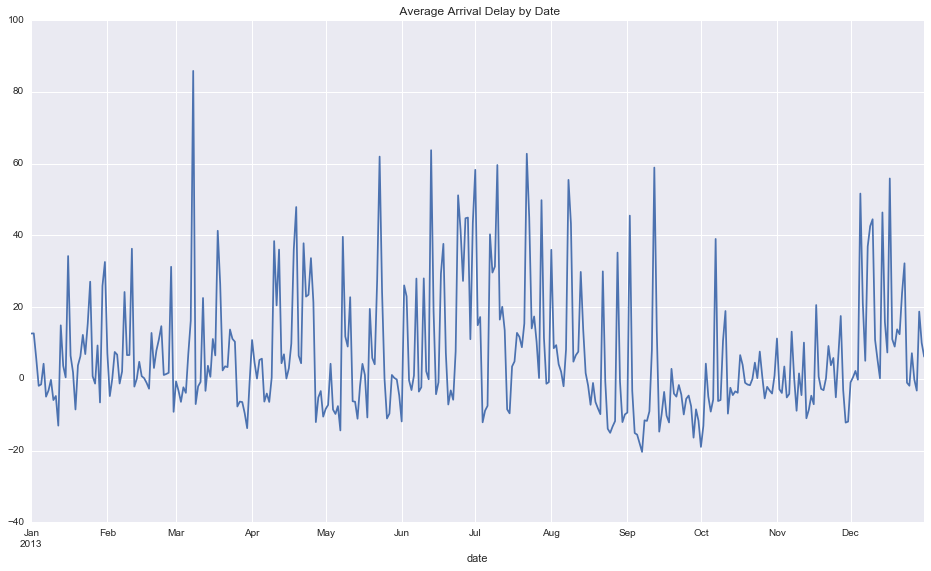

In [49]:
plt.figure(figsize = (16,9))
pivot = pd.pivot_table(data = clean_df, values = 'arr_delay', aggfunc = 'mean', index = 'date')
p = pivot.sort_values(ascending = False)
#Printing the first date that has the largest average arrival delay 
print p.head(1)
pivot.plot(title=' Average Arrival Delay by Date');

<b> Ans </b> Thus after creating a pivot table where the aggregating function is the mean we see that the date where the average arrival delay is the largest is : 2013-03-08 the delay is 85.862155 . Also we created a visualization to see this sums up. 

/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


date
2013-03-08    83.536921
Name: dep_delay, dtype: float64


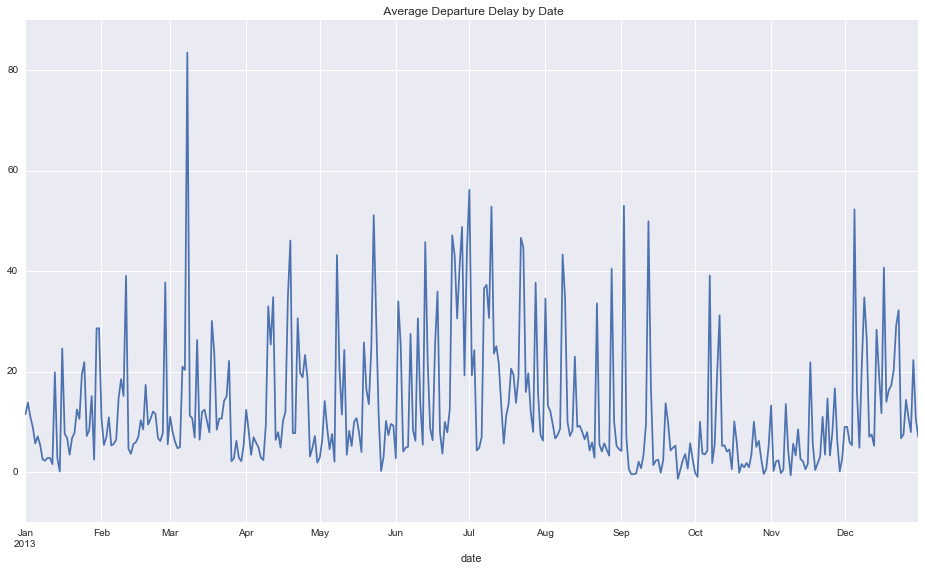

In [50]:
clean_df = flights_df[np.isnan(flights_df['dep_delay']) == False]
clean_df['date'] = pd.to_datetime((clean_df.year*10000 + clean_df.month*100 + clean_df.day).apply(str), format = "%Y%m%d")

plt.figure(figsize = (16,9))
pivot = pd.pivot_table(data = clean_df, values = 'dep_delay', aggfunc = 'mean', index = 'date')
p = pivot.sort_values(ascending = False)
#Printing the first date that has the largest average arrival delay 
print p.head(1)
pivot.plot(title=' Average Departure Delay by Date');

<b> Ans </b> Thus after creating a pivot table where the aggregating function is the mean we see that the date where the average arrival delay is the largest is : 2013-03-08 the delay is 83.536921 . Also we created a visualization to see this sums up. 

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [51]:
clean_df = flights_df[np.isnan(flights_df['dep_delay']) == False]
clean_df['date'] = pd.to_datetime((clean_df.year*10000 + clean_df.month*100 + clean_df.day).apply(str), format = "%Y%m%d")
clean_df['weekday'] = clean_df['date'].apply(lambda x: x.weekday())
by_day = clean_df.pivot_table('dep_delay', index = 'weekday', aggfunc= 'mean')
p = by_day.sort_values(ascending = False)
p.head(1)

/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


weekday
3    16.14892
Name: dep_delay, dtype: float64

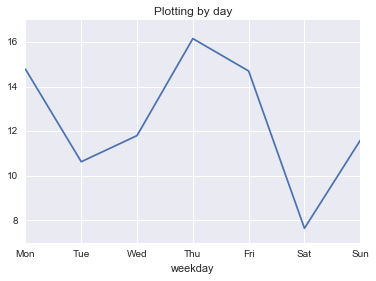

In [52]:
fig, ax = plt.subplots()
by_day.plot(title = 'Plotting by day')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

<b> Ans </b> So first using the date column we created a new column called weekday which is numbered from 0 to 6 to represent the different days of the week from Monday - Sunday. Once we did that we created a pivot table which calculated the average departure delay from NYC by the days of the week. Once we do that we sort this pivot table in reverse order and observe that <i> Thursday </i> is the day that the departure delay is the most in the year 2013. Hence this would be the day that one must avoid flying out of NYC

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [53]:
season_lookup = {11: 'Winter',
                 12: 'Winter',
                 1: 'Winter',
                 2: 'Spring',
                 3: 'Spring',
                 4: 'Spring',
                 5: 'Summer',
                 6: 'Summer',
                 7: 'Summer',
                 8: 'Autumn',
                 9: 'Autumn',
                 10: 'Autumn'}
# utilizing the clean_df from the previous question 
clean_df['season'] = clean_df['month'].apply(lambda x: season_lookup[x])

/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


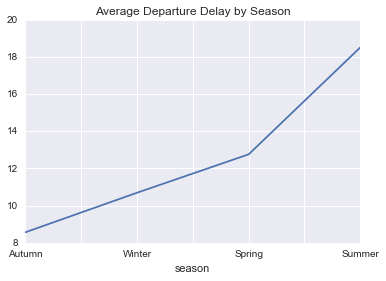

In [54]:
by_season = clean_df.pivot_table('dep_delay', index = 'season', aggfunc = 'mean')
fig, ax = plt.subplots()
by_season = by_season.sort_values()
by_season.plot(title = 'Average Departure Delay by Season')

<b> Ans </b> We created a season lookup list that creates a new column called Season where months 11,12,1 are Winter 2-4 are Spring 5-7 are Summer and 8-10 are Autumn. After doing this we perform an aggregation by Season and calculate the average departure delay from NYC and observe that in in Autumn the delay is the least, then slowly in Winter the delay increase, it further increased in Spring and as we can see in the visualization the departure delay is the most in the Summer

(d) On average, how do departure delays vary over the course of a day?

([<matplotlib.axis.XTick at 0x1169c8ad0>,
 <a list of 25 Text xticklabel objects>)

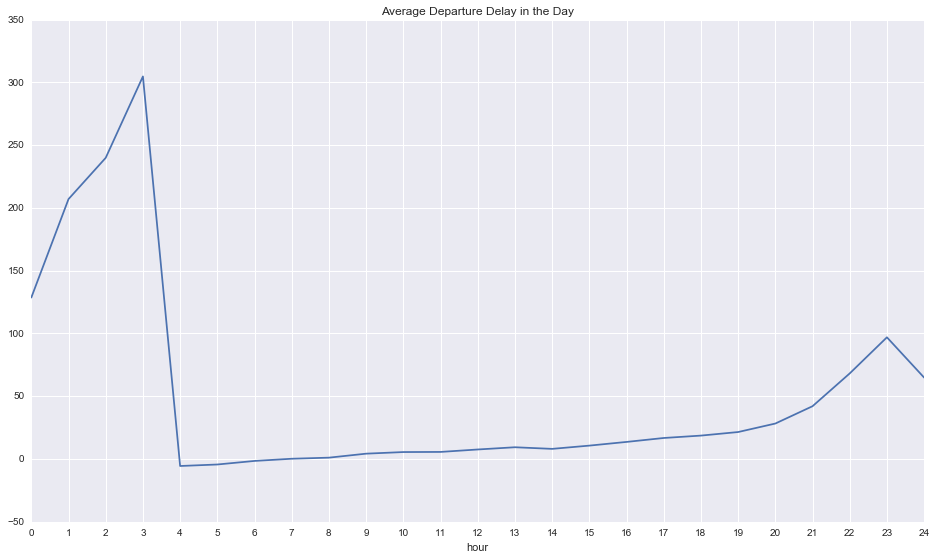

In [55]:
by_hour = clean_df.pivot_table('dep_delay', index = 'hour', aggfunc='mean')
plt.figure(figsize=(16,9))
by_hour.plot(title = 'Average Departure Delay in the Day')
plt.xticks(by_hour.index.values )

<

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [56]:
flights_df['speed'] = flights_df['distance']/(flights_df['air_time']/60)

In [57]:
flights_df.sort(['speed'], ascending = False).head(1)

/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,703.384615


First we created a new column by dividing the distance of the flight by the total air_time ( in hours) and called it speed. After that we sorted the dataframe in descending order and returned the topmost row which we can see is a Delta Airlines flight to Atlanta From LaGuardia Airport in the year 2013 

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [58]:
unique_group = flights_df.groupby(['carrier','flight','dest']).count()
every_day_flights = unique_group[unique_group['day'] == 365]
every_day_flights

Unnamed: 0  year  month  day  dep_time  dep_delay  \
carrier flight dest                                                      
AA      59     SFO          365   365    365  365       359        359   
        119    LAX          365   365    365  365       361        361   
        181    LAX          365   365    365  365       363        363   
        1357   SJU          365   365    365  365       364        364   
        1611   MIA          365   365    365  365       360        360   
B6      219    CLT          365   365    365  365       363        363   
        359    BUR          365   365    365  365       364        364   
        371    FLL          365   365    365  365       359        359   
        431    SRQ          365   365    365  365       362        362   
        703    SJU          365   365    365  365       364        364   
        1783   MCO          365   365    365  365       365        365   
DL      2159   MCO          365   365    365  365       364        364   
        2391   TPA          365   365    365  365       360        360   
EV      5712   IAD          365   365    365  365       351        351   
UA      15     HNL          365   365    365  365       363        363   
VX      251    LAS          365   365    365  365       364        364   
        407    LAX          365   365    365  365       364        364   
        413    LAX          365   365    365  365       362        362   

                     arr_time  arr_delay  tailnum  origin  air_time  distance  \
carrier flight dest                                                             
AA      59     SFO        359        359      363     365       359       365   
        119    LAX        361        359      364     365       359       365   
        181    LAX        363        362      365     365       362       365   
        1357   SJU        364        363      364     365       363       365   
        1611   MIA        360        360      364     365       360       365   
B6      219    CLT        363        363      365     365       363       365   
        359    BUR        364        364      365     365       364       365   
        371    FLL        359        359      365     365       359       365   
        431    SRQ        362        361      365     365       361       365   
        703    SJU        364        364      365     365       364       365   
        1783   MCO        365        365      365     365       365       365   
DL      2159   MCO        364        364      365     365       364       365   
        2391   TPA        360        359      365     365       359       365   
EV      5712   IAD        351        351      365     365       351       365   
UA      15     HNL        363        359      363     365       359       365   
VX      251    LAS        364        364      365     365       364       365   
        407    LAX        363        363      365     365       363       365   
        413    LAX        362        360      365     365       360       365   

                     hour  minute  speed  
carrier flight dest                       
AA      59     SFO    359     359    359  
        119    LAX    361     361    359  
        181    LAX    363     363    362  
        1357   SJU    364     364    363  
        1611   MIA    360     360    360  
B6      219    CLT    363     363    363  
        359    BUR    364     364    364  
        371    FLL    359     359    359  
        431    SRQ    362     362    361  
        703    SJU    364     364    364  
        1783   MCO    365     365    365  
DL      2159   MCO    364     364    364  
        2391   TPA    360     360    359  
EV      5712   IAD    351     351    351  
UA      15     HNL    363     363    359  
VX      251    LAS    364     364    364  
        407    LAX    364     364    363  
        413    LAX    362     362    360

We create a group of flights by the carrier dest and flight columns and we then took a count across the day column to identify which flights fly 365 days of the year and observed the following flights 

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


Our research question is as follows: 

Does an airline carriers HUB Airport determine the frequency of flights flying from NYC airports to these airports ? 

In [111]:
fortworth_flights = flights_df[flights_df['dest'] == 'DFW']
sfo_flights = flights_df[flights_df['dest'] == 'SFO']
atl_flights = flights_df[flights_df['dest'] == 'ATL']

fortworth_flights['date'] = pd.to_datetime((fortworth_flights.year*10000 + fortworth_flights.month*100 + fortworth_flights.day).apply(str), format = "%Y%m%d")
sfo_flights['date'] = pd.to_datetime((sfo_flights.year*10000 + sfo_flights.month*100 + sfo_flights.day).apply(str), format = "%Y%m%d")
atl_flights['date'] = pd.to_datetime((atl_flights.year*10000 + atl_flights.month*100 + atl_flights.day).apply(str), format = "%Y%m%d")

g = fortworth_flights.groupby(['month','carrier']).count()
h = sfo_flights.groupby(['month','carrier']).count()
i = atl_flights.groupby(['month','carrier']).count()


/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

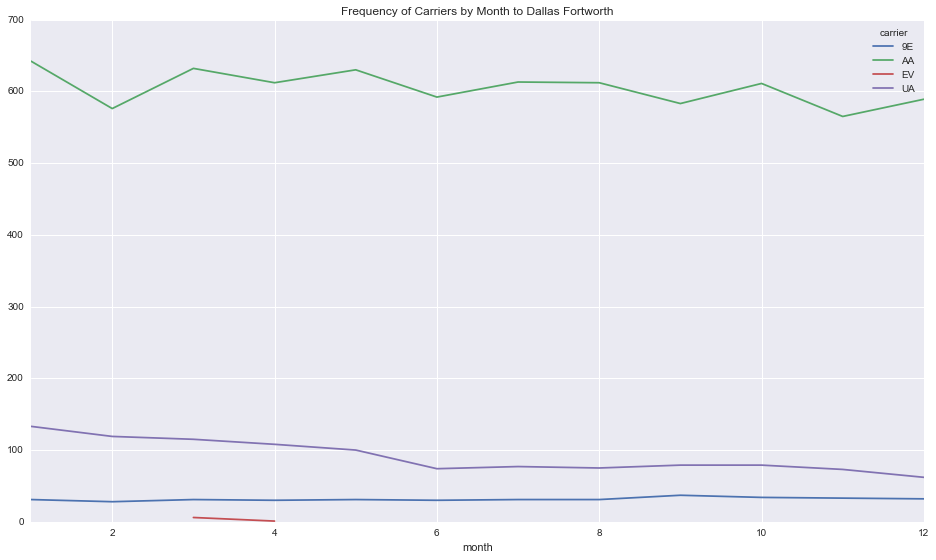

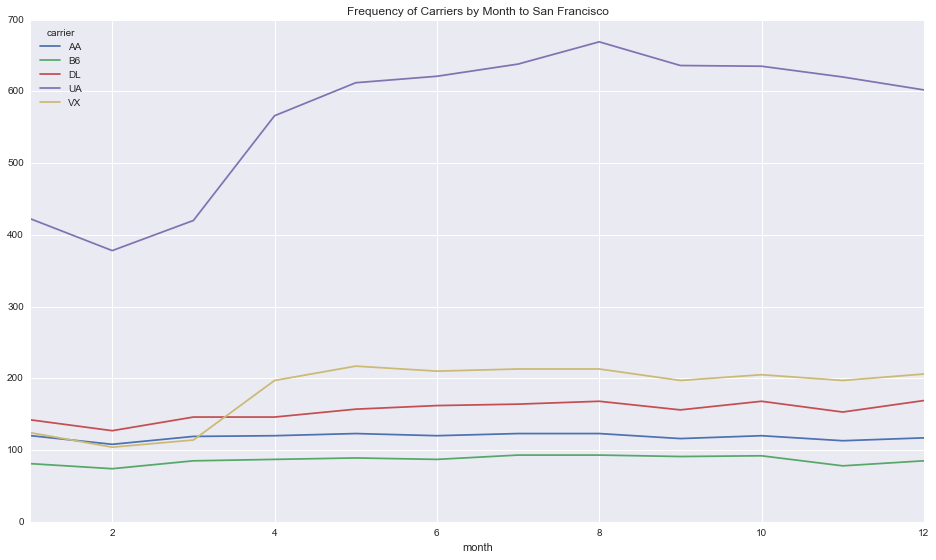

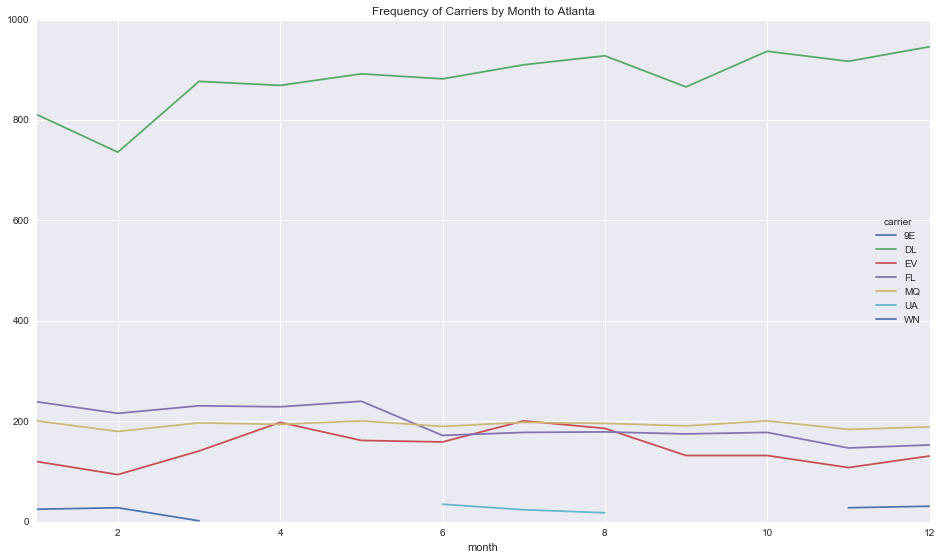

In [113]:
test = g['year']
test1 = test.unstack()
test1.plot(figsize=(16,9) , title = 'Frequency of Carriers by Month to Dallas Fortworth')
test = h['year']
test1 = test.unstack()
test1.plot(figsize=(16,9), title = 'Frequency of Carriers by Month to San Francisco')
test = i['year']
test1 = test.unstack()
test1.plot(figsize=(16,9), title = 'Frequency of Carriers by Month to Atlanta')

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [49]:
weather_df = pd.read_csv('/Users/abhi/Documents/UW/Courses/Spring_Quarter_17/INFX-574/data/Problem_Set_1/weather.csv')

In [29]:
weather_df.dtypes

Unnamed: 0             int64
origin                object
year                   int64
month                float64
day                  float64
hour                 float64
temp                 float64
dewp                 float64
humid                float64
wind_dir             float64
wind_speed           float64
wind_gust            float64
precip               float64
pressure             float64
visib                float64
date          datetime64[ns]
dtype: object

In [24]:
weather_df['date'] = pd.to_datetime((weather_df.year*10000 + weather_df.month*100 + weather_df.day).apply(str), format = "%Y%m%d")

In [26]:
weather_delay_merged = weather_df.merge(clean_df, on = 'date')

In [37]:
weather_delay_merged['visib'].describe()

count    7.850836e+06
mean     9.252625e+00
std      2.049019e+00
min      1.200000e-01
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.000000e+01
Name: visib, dtype: float64

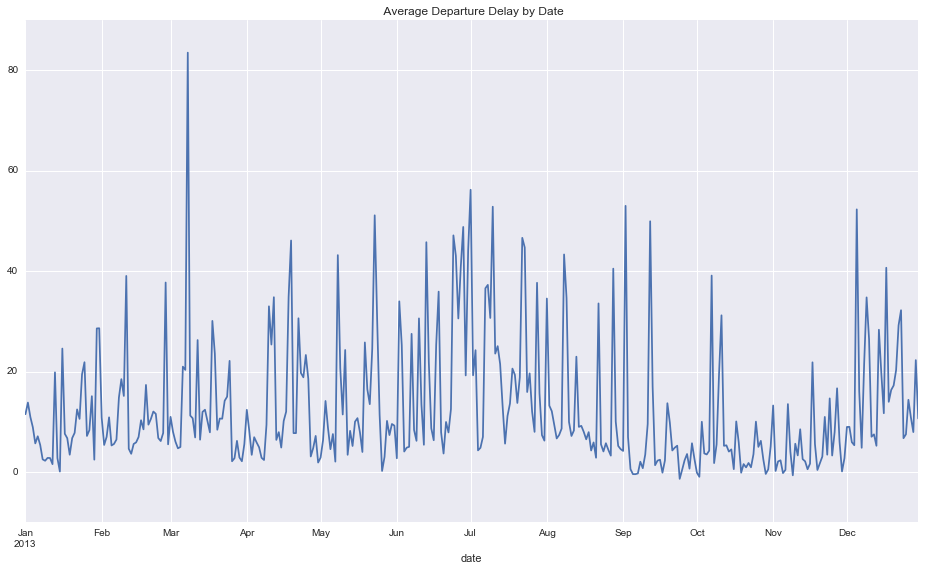

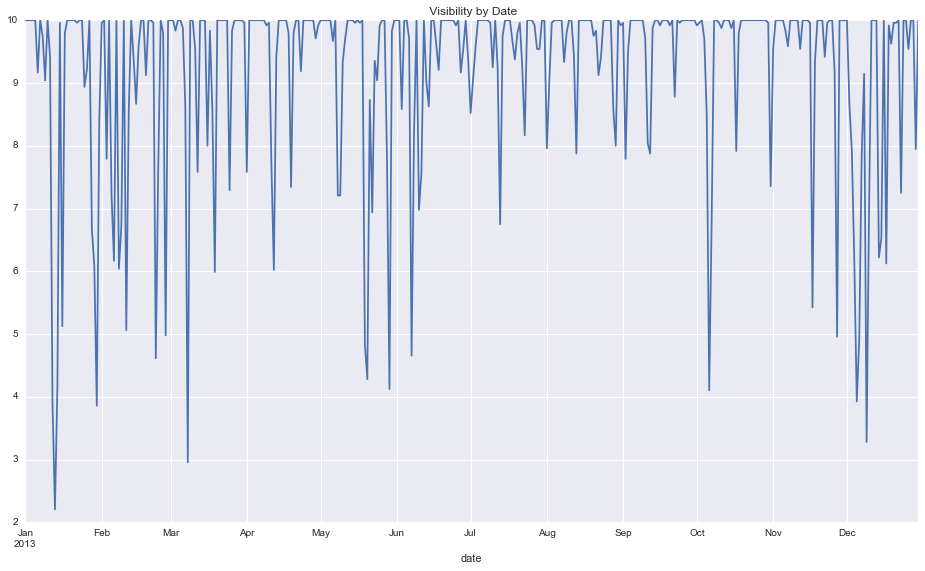

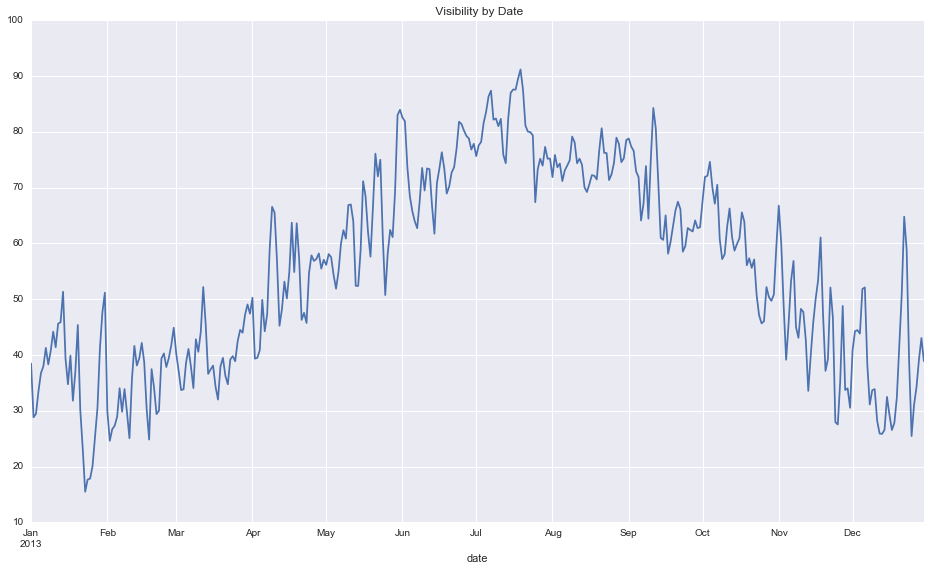

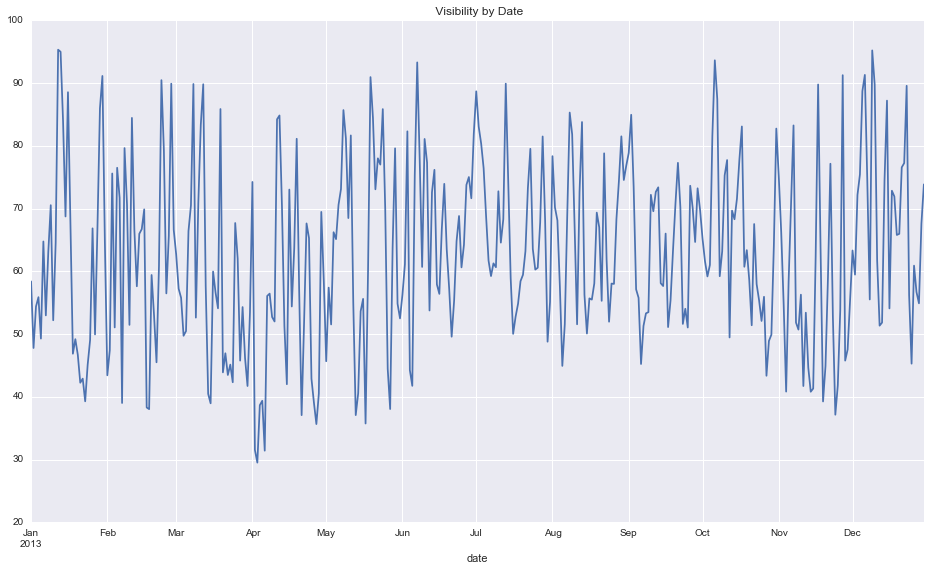

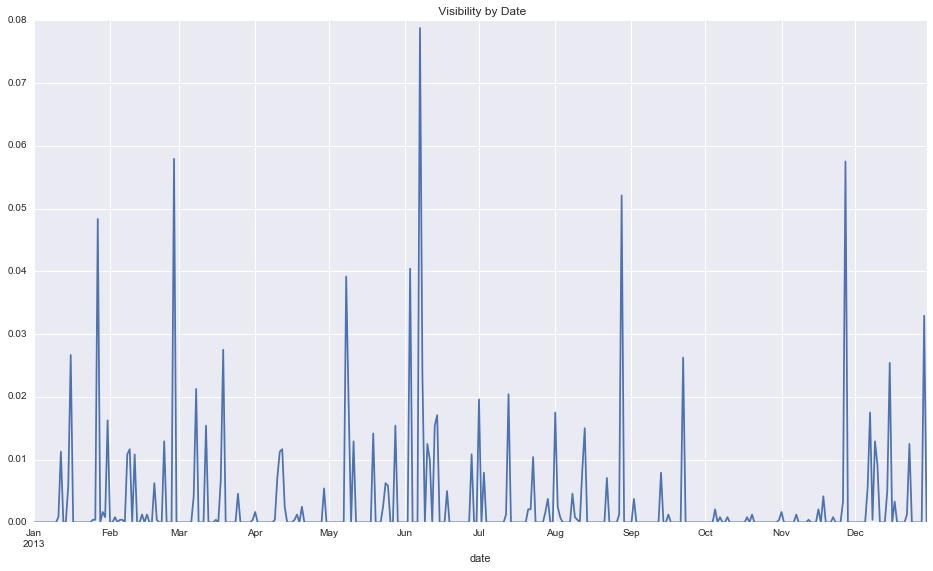

In [44]:
plt.figure(figsize = (16,9))
pivot1 = pd.pivot_table(data = weather_delay_merged, values = 'dep_delay' , aggfunc = 'mean', index = 'date')
pivot1.plot(title=' Average Departure Delay by Date');

plt.figure(figsize = (16,9))
pivot2 = pd.pivot_table(data = weather_delay_merged, values = 'visib', aggfunc = 'mean', index = 'date')
pivot2.plot(title=' Visibility by Date');

plt.figure(figsize = (16,9))
pivot3 = pd.pivot_table(data = weather_delay_merged, values = 'temp', aggfunc = 'mean', index = 'date')
pivot3.plot(title=' Visibility by Date');

plt.figure(figsize = (16,9))
pivot4 = pd.pivot_table(data = weather_delay_merged, values = 'humid', aggfunc = 'mean', index = 'date')
pivot4.plot(title=' Visibility by Date');

plt.figure(figsize = (16,9))
pivot5 = pd.pivot_table(data = weather_delay_merged, values = 'precip', aggfunc = 'mean', index = 'date')
pivot5.plot(title=' Visibility by Date');

-- Enter your interpretation here --